In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('stars.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [3]:
df.info()
#informatie despre date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
df['Color'].value_counts()
#ne uitam la date din coloana data

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Orange                  2
yellowish               2
Whitish                 2
Blue-White              1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
White-Yellow            1
Name: Color, dtype: int64

In [5]:
df['Spectral_Class'].value_counts()
#ne uitam la date din coloana data

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [6]:
df['A_M'].value_counts()
#ne uitam la date din coloana data

 12.230    3
 14.230    2
-7.220     2
-10.700    2
 12.780    2
          ..
 20.020    1
 12.970    1
-7.262     1
-7.450     1
-5.920     1
Name: A_M, Length: 228, dtype: int64

In [7]:
df=pd.get_dummies(df,columns=['Color','Spectral_Class'],drop_first=True)

In [8]:
df

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [24]:
x=df.drop(['Type'],axis=1).values
y=df['Type'].values

In [25]:
x

array([[3.06800e+03, 2.40000e-03, 1.70000e-01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [3.04200e+03, 5.00000e-04, 1.54200e-01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.60000e+03, 3.00000e-04, 1.02000e-01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [8.82900e+03, 5.37493e+05, 1.42300e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.23500e+03, 4.04940e+05, 1.11200e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.78820e+04, 2.94903e+05, 1.78300e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [28]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [29]:
y_pred

array([2.2, 0.4, 3. , 4.4, 4.6, 4.6, 4.6, 2.2, 0.2, 2. , 4.6, 2. , 4.6,
       4.4, 4.8, 4.4, 0.2, 0.8, 2.6, 0.6, 0.2, 0.4, 4.4, 3.4, 4.4, 3.2,
       1. , 2.2, 4.2, 2.4, 3. , 4.4, 2. , 0.4, 0.4, 0.2, 0.2, 4.4, 0.8,
       4.4, 4.6, 4.4, 4.6, 0. , 3. , 0.2, 4.6, 3. , 0.6, 0.8, 2.2, 0.2,
       2. , 0.6, 4.2, 2. , 4.4, 2.2, 0.8, 0.8])

In [30]:
mean_squared_error(y_pred,y_test)

0.19866666666666657

In [31]:
mean_squared_error(y_pred,y_test)**(1/2)

0.44572039067858066

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_pred,y_test)

0.3666666666666666

In [34]:
test=pd.DataFrame(y_test,columns=['y_test'])

In [35]:
test['y_pred']=y_pred

In [36]:
test

,y_test,y_pred
0,2,2.2
1,0,0.4
2,3,3.0
3,4,4.4
4,4,4.6
5,5,4.6
6,5,4.6
7,2,2.2
8,0,0.2
9,2,2.0


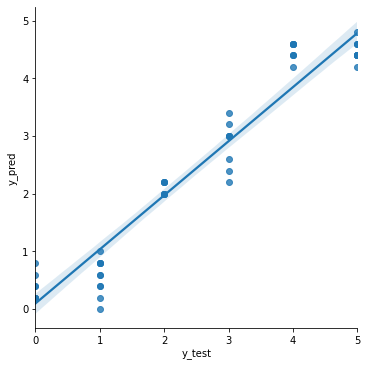

In [37]:
sns.lmplot(data=test,x='y_test',y='y_pred')

In [38]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=linear.predict(x_test)

In [40]:
mean_squared_error(y_pred,y_test)

0.08214152011301819

In [41]:
mean_absolute_error(y_pred,y_test)

0.21731164648218879

In [42]:
test['y_test']=y_test
test['y_pred']=y_pred

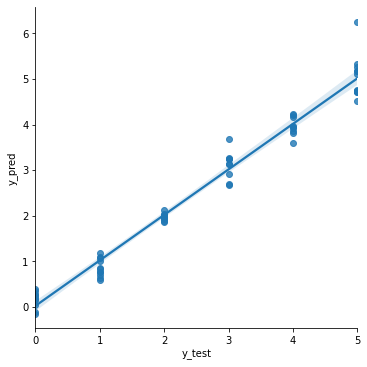

In [43]:
sns.lmplot(data=test,x='y_test',y='y_pred')

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [46]:
x=df.drop(['Type'],axis=1).values
y=df['Type'].values

In [49]:
logit=LogisticRegression(max_iter=100000)
logit.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [50]:
logit.predict_proba(x_test)

array([[6.51634158e-055, 9.25640814e-012, 9.98441735e-001,
        1.55826512e-003, 1.22017364e-022, 3.03137325e-030],
       [9.99489337e-001, 5.10518787e-004, 2.57382975e-008,
        9.13696319e-010, 6.23886711e-008, 5.54686407e-008],
       [1.19701782e-015, 4.11538987e-003, 1.44743397e-001,
        8.51139331e-001, 1.86999565e-006, 1.27035123e-008],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        8.29246134e-046, 1.00000000e+000, 2.47610172e-025],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.00022988e-011, 9.99999998e-001, 1.93930025e-009],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 7.16640398e-028, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 7.33960467e-008, 9.99999927e-001],
       [1.59603849e-036, 1.60854613e-007, 9.95396694e-001,
        4.60314494e-003, 7.25195268e-016, 3.86500788e-021],
       [9.94605216e-001, 5.39264099e-003, 7.3930

In [51]:
y_pred=logit.predict(x_test)
#o metoda de predictie

In [52]:
accuracy_score(y_pred,y_test)

0.9666666666666667

In [54]:
df['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

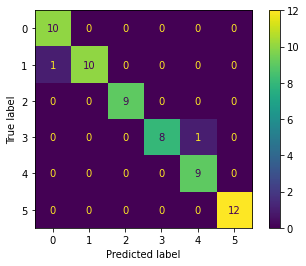

In [55]:
plot_confusion_matrix(logit,x_test,y_test)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#a doua metota de predictie

In [57]:
std=StandardScaler()
std.fit(x_train)
x_train_tr=std.transform(x_train)
x_test_tr=std.transform(x_test)

In [58]:
logit.fit(x_train_tr,y_train)

LogisticRegression(max_iter=100000)

In [59]:
y_pred=logit.predict(x_test_tr)

In [60]:
accuracy_score(y_test,y_pred)

1.0

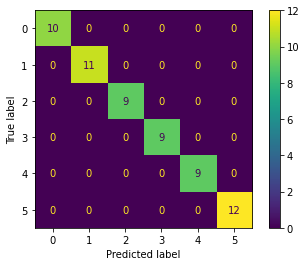

In [61]:
plot_confusion_matrix(logit,x_test_tr,y_test)

In [62]:
#Aceasta metoda e mai reusita

In [63]:
minMax=MinMaxScaler()
x_train=minMax.fit_transform(x_train)
x_test_tr=minMax.transform(x_test)
#cea mai buna metoda de predictie

In [64]:
logit.fit(x_train_tr,y_train)

LogisticRegression(max_iter=100000)

In [65]:
y_pred=logit.predict(x_test_tr)

In [66]:
accuracy_score(y_test,y_pred)

0.8166666666666667

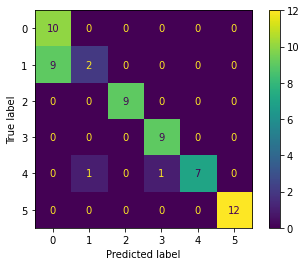

In [67]:
plot_confusion_matrix(logit,x_test_tr,y_test)

In [ ]:
#Nu e reusita 